# Newton Fractal

In [2]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt

***
a) For $a=0$ and $a=1$ each do two iterations of Newton's method starting in $x_0=0.75$.
***

The following code might be useful, but is not really good for anything else:

In [5]:
# Normally we would do this one-dimensional, but since we later use 2D code, we do it here too.
def f(x, y):
    return np.array([(x**3 - 3*x*y**2 - 1)**2 + (3*x**2*y - y**3)**2])

def J(x, y):
    return np.array([2*(x**3 - 3*x*y**2 - 1)*(3*x**2 - 3*y**2) + 2*(3*x**2*y - y**3)*6*x*y])

def step1D(x, y):
    F = f(x, y)
    Jx = J(x, y)
    delta = F / Jx
    return x - delta[0]

def newton_iterations(x0, y, steps=2):
    x = x0
    print(f"\nNewton iterations with a={y}:")
    for i in range(steps):
        print(f"  Iteration {i}: x = {x:.6f}")
        x = step1D(x, y)
    print(f"  Iteration {steps}: x = {x:.6f}")
    return x

# Run for a=0 and a=1 with x0=0.75
newton_iterations(0.75, 0, steps=2)
newton_iterations(0.75, 1, steps=2)



Newton iterations with a=0:
  Iteration 0: x = 0.750000
  Iteration 1: x = 0.921296
  Iteration 2: x = 0.964106

Newton iterations with a=1:
  Iteration 0: x = 0.750000
  Iteration 1: x = 0.127655
  Iteration 2: x = -0.292384


np.float64(-0.29238439784989345)

***
e) Perform two Newton iterations for each of the three starting points
$$(x_0,y_0)\in\{(0.8,0.1),\;(-0.6,0.7),\;(-0.6,-0.7)\}.$$
Compute $(x_1,y_1)$, $(x_2,y_2)$, and assign each sequence to the appropriate analytical zero.
***

The following code might be helpful:

In [4]:
def f(x, y):
    return np.array([x**3 - 3*x*y**2 - 1,  3*x**2*y - y**3])

def J(x, y):
    """Jacobi matrix of f(x,y)"""
    return np.array([[3*x**2 - 3*y**2, -6*x*y],
                     [6*x*y, 3*x**2 - 3*y**2]])

def step(x, y):
	"""One Newton step in R^2."""
	F = f(x, y)
	print(f'f=',F)
	print('J=',J(x, y))
	J_inv = np.linalg.inv(J(x, y))
	print(f'inv(J)=',J_inv)
	delta = J_inv @ F
	print(delta)
	print(x - delta[0], y - delta[1])
	return x - delta[0], y - delta[1]

step( x= , y= )

SyntaxError: expected argument value expression (772280467.py, line 21)

***
f) Implement Newton's method in $\mathbb{R}^2$. For $(x,y)=.....$ test your method, comment on which root the methods converges to, plot the error against the iteration and find the convergence order.
***

Root found at x=-0.4999999999999986, y=0.8660254037844376, f(x,y)=[-4.77395901e-15 -2.10942375e-15]
We thus found the root [-0.5        0.8660254]


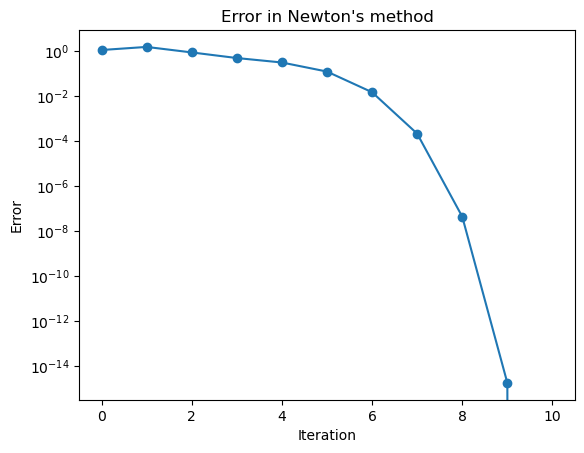

Convergence order estimate: 2.00192475673911


In [ ]:
def Newton(f, J, x0, y0, iter_max=100, tol=1e-10):
	"""Newton's method in R^2 starting from (x0,y0)"""
	x, y = x0, y0
	for i in range(iter_max):
		x_new, y_new = newton_step(....)
		if z_new close to z or f close to 0:
			return x_new, y_new
		x, y = x_new, y_new
	return x, y

def newton_step(f, J, x, y):
    """One Newton step in R^2"""
    delta = np.linalg.solve(J(x, y),f(x, y)) # Please never use te inverse if not absolutely necessary
    return x - delta[0], y - delta[1]

def f(x, y):
    return np.array([x**3 - 3*x*y**2 - 1,  3*x**2*y - y**3])

def J(x, y):
    """Jacobi matrix of f(x,y)"""
    return np.array([[3*x**2 - 3*y**2, -6*x*y],
                     [6*x*y, 3*x**2 - 3*y**2]])

x0, y0 = ......
x, y = Newton(f, J, x0, y0)
print(f'Root found at x={x}, y={y}, f(x,y)={f(x,y)}')
r = actual root
print('We thus found the root', r)

errors = [np.linalg.norm([x0, y0] - r, ord=2)]
for _ in range(10): # the 10th iteration already converges to machine precision
	x0, y0 = newton_step(f, J, x0, y0)
	errors.append(np.linalg.norm([x0, y0] - r, ord=2))

plt.semilogy(errors, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error in Newton\'s method')
plt.show()

# Since the 10th iteration already converges to machine precision, we estimate the convergence order from the 7th to the 9th iteration
# (we need 3 points to estimate the order, see lecture notes, normally we would use the last 3 points)
print('Convergence order estimate:', np.log(errors[-2]/errors[-3])/np.log(errors[-3]/errors[-4]))

***
g) On a grid in $[-2,2]\times[-2,2]$, iterate until convergence or until a maximum number of iterations is reached, and colour each starting point according to the root it converges to. Plot the result, called the Newton fractal.
***

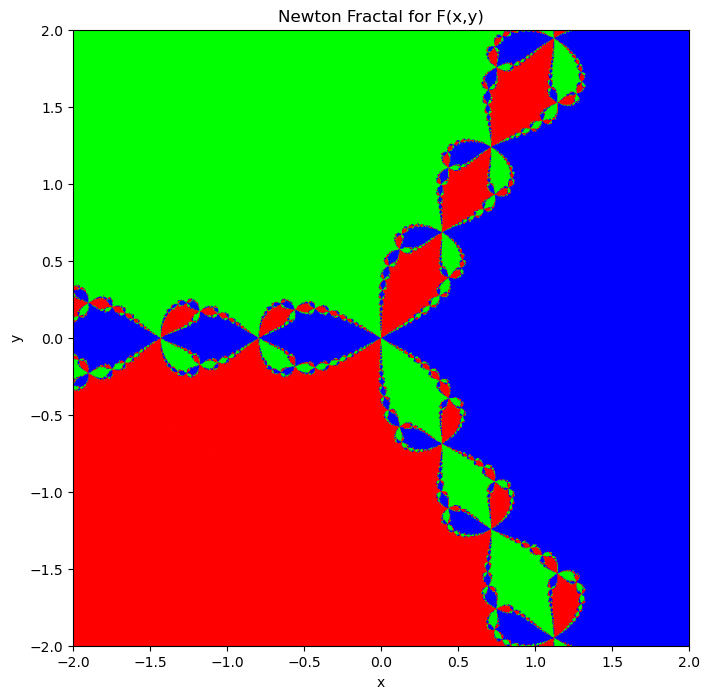

In [ ]:
def f(x, y):
    return np.array([x**3 - 3*x*y**2 - 1,  3*x**2*y - y**3])

def J(x, y):
    """Jacobi matrix of f(x,y)"""
    return np.array([[3*x**2 - 3*y**2, -6*x*y],
                     [6*x*y, 3*x**2 - 3*y**2]])

def newton_fractal(f, J, roots,
                   xmin=-2, xmax=2, ymin=-2, ymax=2, 
                   width=600, height=600,
                   max_iter=50, tol=1e-6):
    # space discretization
    xs = np.linspace(xmin, xmax, width)
    ys = np.linspace(ymin, ymax, height)
    img = np.zeros((height, width))
    
    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            xk, yk = x, y
            for _ in range(max_iter):
                try:
                    xk, yk = step...
                except np.linalg.LinAlgError:
                    break
            # Root-finding
            for k, r in enumerate(roots):
                if [xk,yk] close to r:
                    img[i, j] = k+1
                    break
    return img

# zeroes of F(x,y) = (x^3 - 3xy^2 - 1, 3x^2y - y^3)
roots = [
	np.array([1.0, 0.0]),
	np.array([-0.5,  np.sqrt(3)/2]),
	np.array([-0.5, -np.sqrt(3)/2])
]

# calculate fractal
img = newton_fractal(f, J, roots, width=800, height=800)

# Plot
plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Newton Fractal for F(x,y)")
plt.show()


This function $F(x,y)$ comes from separating real and imaginary parts of the complex equation $f(z)=z^3-1$. An implementation with complex numbers is shorter ($z\mapsto z-f(z)/f'(z)$). For experiments:
$$f(z)=z^4-1,\quad z^5-1,\quad z^3-2z+2,\quad \omega z^3-1\ (\omega\in\mathbb{C}\setminus\{0\}).$$
The choice of $f$ changes the number/symmetry of attraction basins and the fractal boundary. The case $f(z)=z^4-1$ produces a characteristic fourfold symmetry.

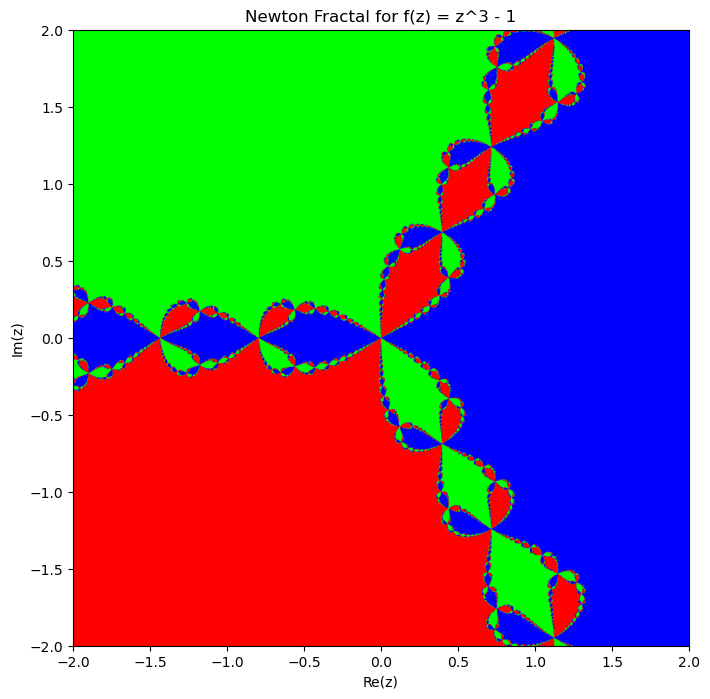

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newton_fractalC(f, df, roots, 
                   xmin=-2, xmax=2, ymin=-2, ymax=2, 
                   width=1000, height=1000, 
                   max_iter=50, tol=1e-6):
    """
    Creates a Newton fractal for a complex function f.
    
    Parameter:
    -----------
    f : callable function f(z).
    df : callable derivative f'(z).
    roots : list of complex roots of f.
    xmin, xmax, ymin, ymax : float, optional, area of the complex plane to visualize.
    width, height : int, optional, dimensions of the output image.
    max_iter : int, optional, maximal number of iterations.
    tol : float, optional, tolerance to consider convergence.
    """
    # grid in R^2 / complex plane
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # Iteration
    for _ in range(max_iter):
        Z -= f(Z) / df(Z)
    
    # Assign each point to a root
    img = np.zeros(Z.shape, dtype=int)
    for k, r in enumerate(roots):
        mask = np.abs(Z - r) < tol
        img[mask] = k + 1
    
    return img

# example for controlling it's the same: f(z) = z^3 - 1
f = lambda z: z**3 - 1
df = lambda z: 3*z**2
roots = [1, -0.5+0.86602540378j, -0.5-0.86602540378j]

img = newton_fractalC(f, df, roots, width=1200, height=1200)

# Plotten
plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Fractal for f(z) = z^3 - 1")
plt.show()


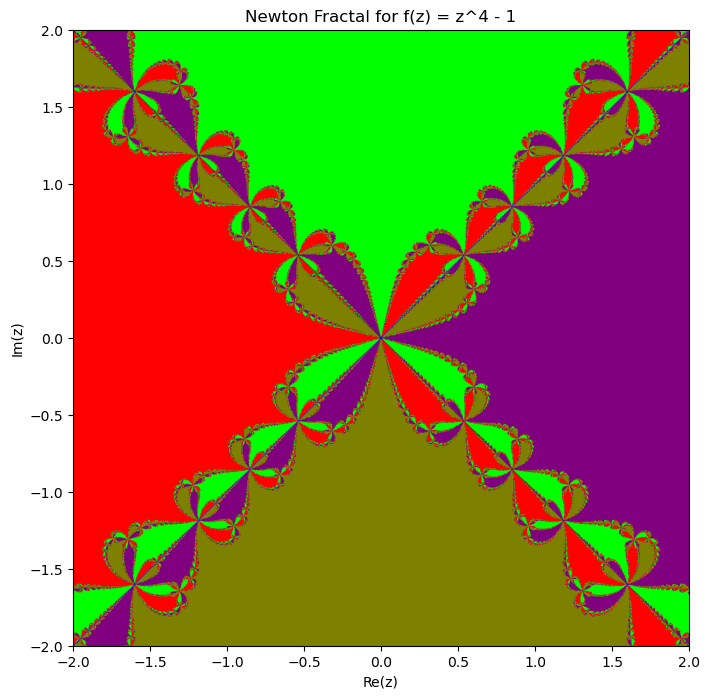

In [ ]:
f = lambda z: z**4 - 1
df = lambda z: 4*z**3
roots = [1, -1, 1j, -1j]

img = newton_fractalC(f, df, roots, width=1200, height=1200)

plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Fractal for f(z) = z^4 - 1")
plt.show()

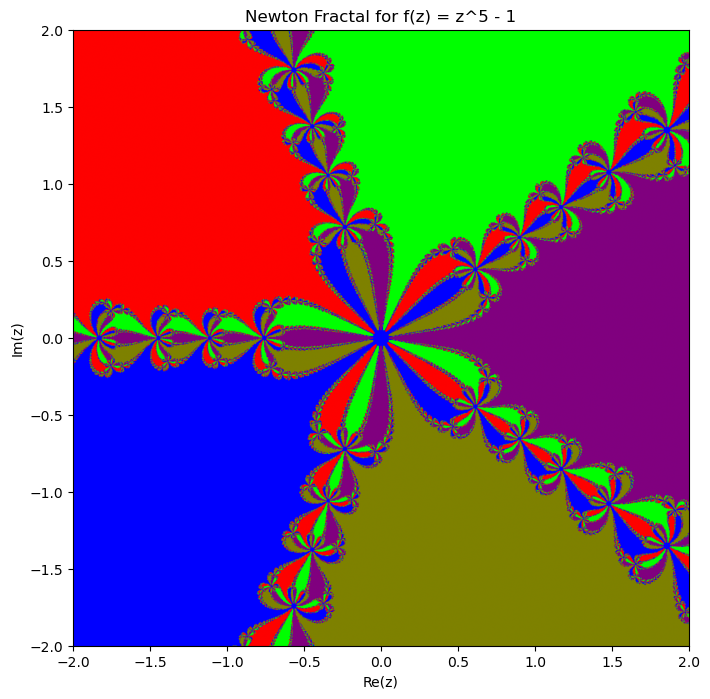

In [ ]:
f = lambda z: z**5 - 1
df = lambda z: 5*z**4
roots = [1, -1/4-sqrt(5)/4-sqrt(5/8-sqrt(5)/8)*1j, -1/4+sqrt(5)/4+sqrt(5/8 + sqrt(5)/8)*1j, -1/4+sqrt(5)/4-sqrt(5/8 + sqrt(5)/8)*1j, -1/4-sqrt(5)/4+sqrt(5/8 - sqrt(5)/8*1j)]

img = newton_fractalC(f, df, roots, width=1200, height=1200)

plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Fractal for f(z) = z^5 - 1")
plt.show()

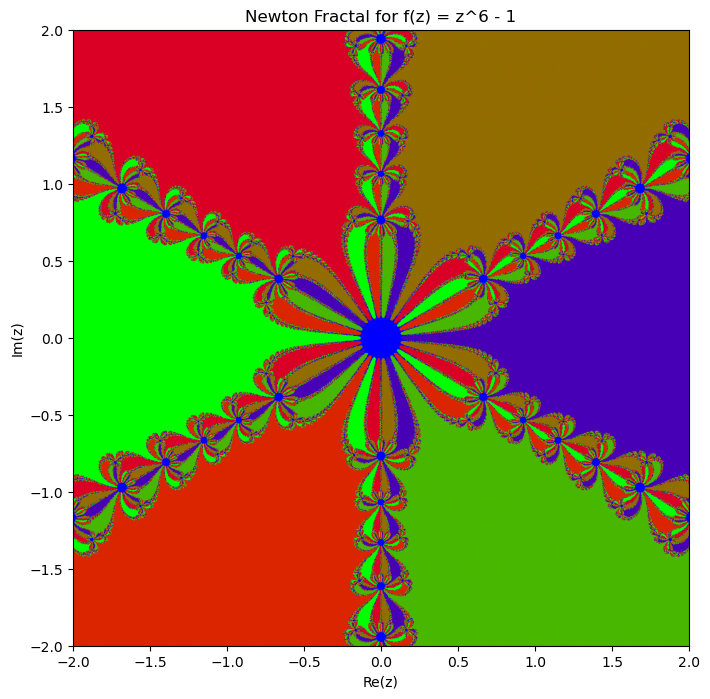

In [ ]:
f = lambda z: z**6 - 1
df = lambda z: 6*z**5
roots = [1, -1, -1/2 - sqrt(3)/2*1j, -1/2 + sqrt(3)/2*1j, 1/2 - sqrt(3)/2*1j, 1/2 + sqrt(3)/2*1j, -1]

img = newton_fractalC(f, df, roots, width=1200, height=1200)

plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Fractal for f(z) = z^6 - 1")
plt.show()

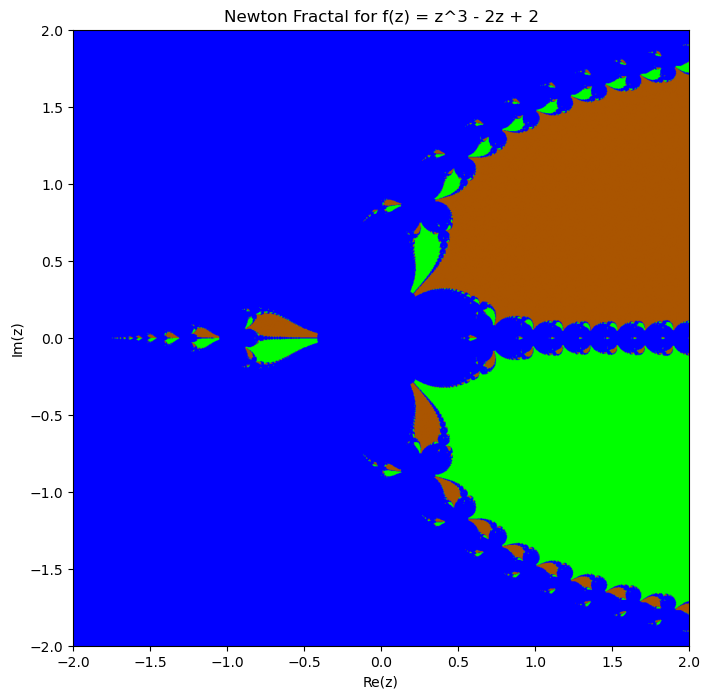

In [ ]:
f = lambda z: z**3 - 2*z + 2
df = lambda z: 4*z**3
roots = [-1.76929235423863, 0.884646177119316 - 0.589742805022206j, 0.884646177119316 + 0.589742805022206j]

img = newton_fractalC(f, df, roots, width=1200, height=1200)

plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Fractal for f(z) = z^3 - 2z + 2")
plt.show()

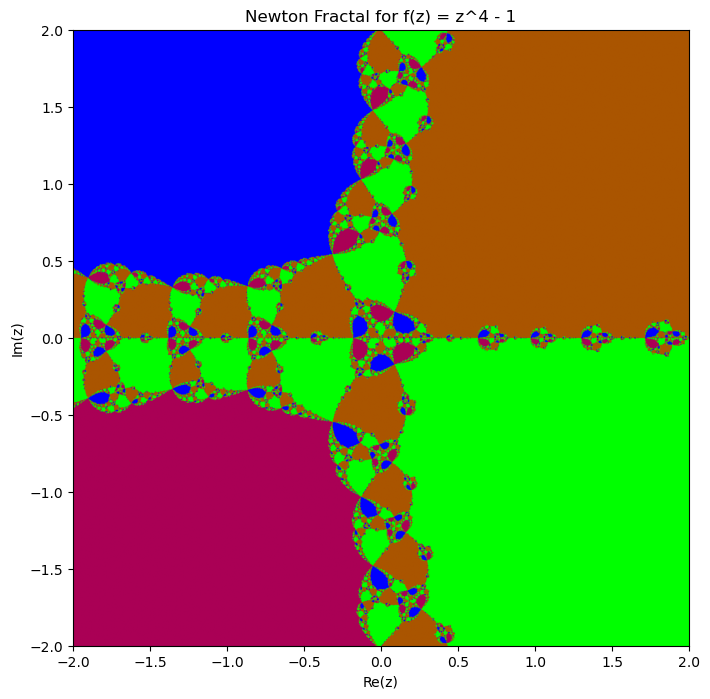

In [ ]:
f = lambda z: z**4 - z + 1
df = lambda z: 4*z**3-1
roots = [-0.727136084491197 - 0.934099289460529j, -0.727136084491197 + 0.934099289460529j, 0.727136084491197 - 0.430014288329716j, 0.727136084491197 + 0.430014288329716j]

img = newton_fractalC(f, df, roots, width=1200, height=1200)

# Plotten
plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Fractal for f(z) = z^4 - z + 1")
plt.show()

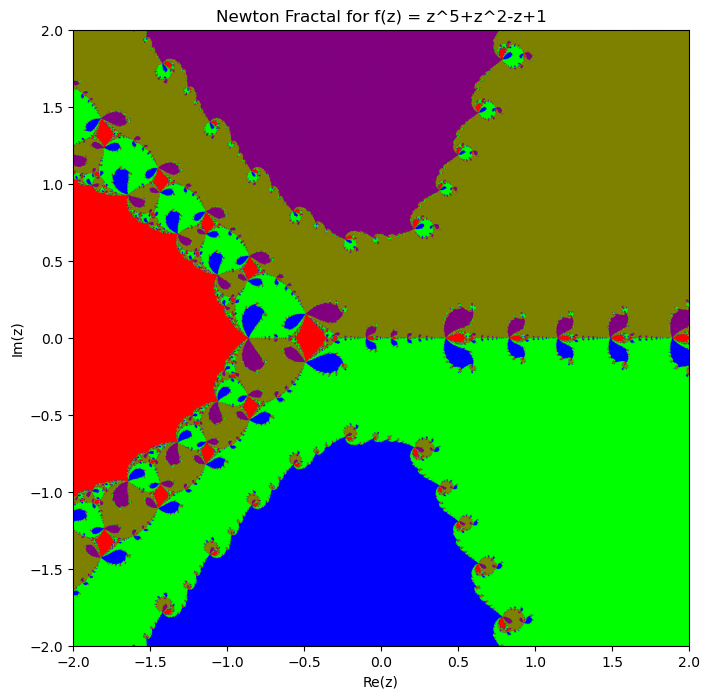

In [ ]:
f = lambda z: z**5 + z**2 - z + 1
df = lambda z: 5*z**4+2*z-1
roots = [1j, -1j, -1.32471795724475, 0.662358978622375 - 0.562279512473995j, 0.662358978622375 + 0.562279512473995j]

img = newton_fractalC(f, df, roots, width=1200, height=1200)

# Plotten
plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Fractal for f(z) = z^5+z^2-z+1")
plt.show()

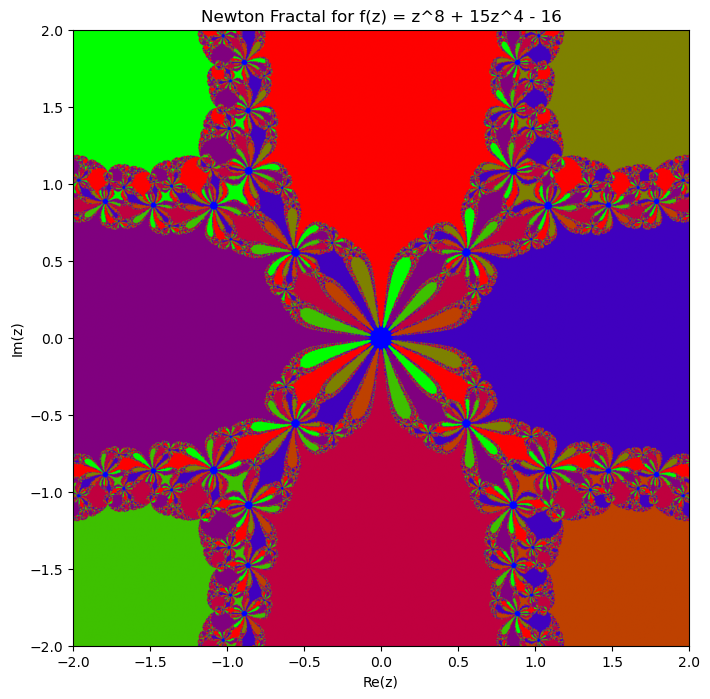

In [ ]:
f = lambda z: z**8+15*z**4-16
df = lambda z: 8*z**7+60*z**3
roots = [1, -1, 1j, -1j, sqrt(2)+sqrt(2)*1j, sqrt(2)-sqrt(2)*1j, -sqrt(2)+sqrt(2)*1j, -sqrt(2)-sqrt(2)*1j]

img = newton_fractalC(f, df, roots, width=1200, height=1200)

plt.figure(figsize=(8,8))
plt.imshow(img, extent=(-2,2,-2,2), cmap="brg")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Fractal for f(z) = z^8 + 15z^4 - 16")
plt.show()